In [1]:
library(tidyverse)
options(repr.matrix.max.rows = 6)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
url_1 <- "https://archive.ics.uci.edu/static/public/257/user+knowledge+modeling.zip"
destination2 <- "data/userknowledge.zip"
download.file(url_1, "data/userknowledge.zip")
outdir1 <- "data/unzip1"
unzip("data/userknowledge.zip", exdir = outdir1)

In [22]:
userknowledge_training <- read_excel("data/unzip1/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = "Training_Data")|>
                          select(STG:UNS)|>
                          mutate(UNS = as_factor(UNS))

userknowledge_testing <- read_excel("data/unzip1/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = "Test_Data")|>
                         select(STG:UNS)|>
                         mutate(UNS = as_factor(UNS))

user_mean <- userknowledge_training|>
              group_by(UNS)|>
              summarize(mean_grade = mean(PEG))|>
              arrange(-mean_grade)
user_mean

New names:
• `` -> `...7`
• `` -> `...8`
New names:
• `` -> `...7`
• `` -> `...8`


UNS,mean_grade
<fct>,<dbl>
High,0.77253968
Middle,0.54238636
Low,0.23762651
very_low,0.09083333


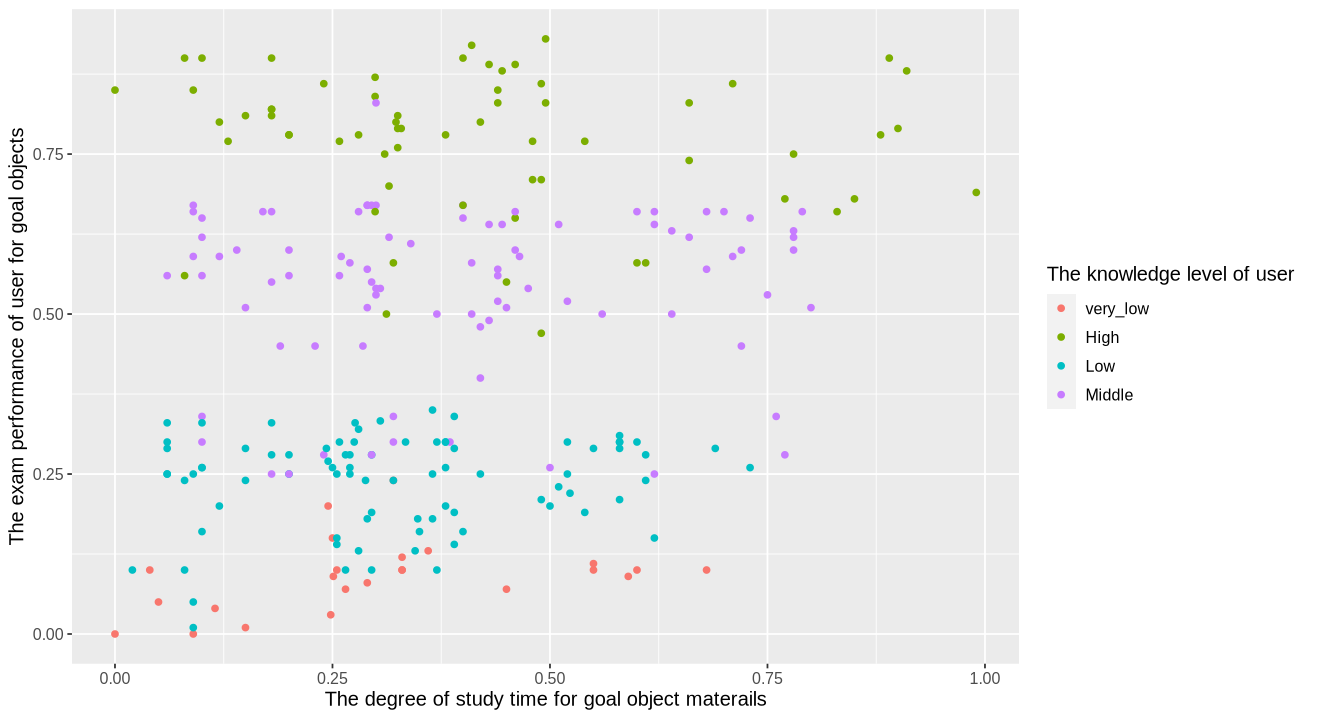

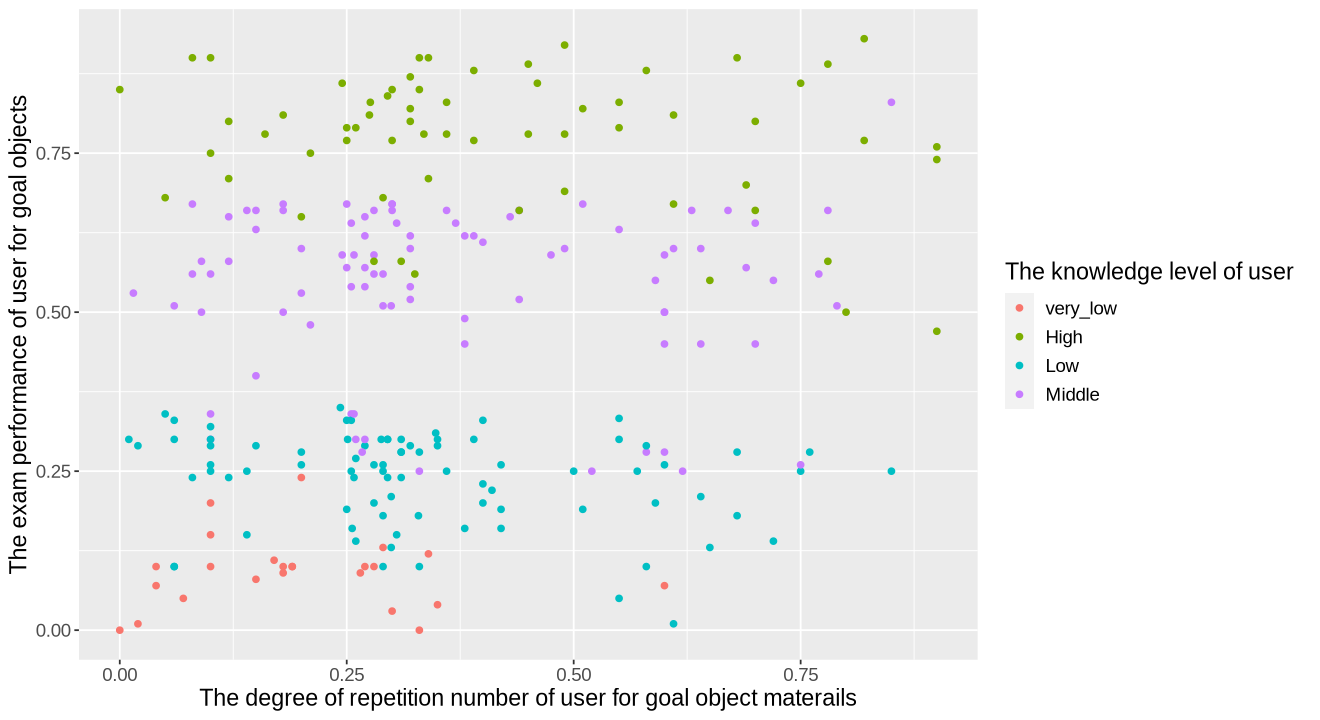

In [14]:
options(repr.plot.width =11 , repr.plot.height = 6) 
STG_PEG_plot <- ggplot(userknowledge_training, aes(x = STG, y = PEG, colour = UNS)) + 
                geom_point() + labs(x = "The degree of study time for goal object materails", 
                                    y = "The exam performance of user for goal objects" , 
                                    colour = "The knowledge level of user") +
                theme(text = element_text(size = 12))
                                     
STG_PEG_plot

SCG_PEG_plot <- ggplot(userknowledge_training, aes(x = SCG, y = PEG, colour = UNS)) + 
                geom_point() + labs(x = "The degree of repetition number of user for goal object materails", 
                                    y = "The exam performance of user for goal objects" , 
                                    colour = "The knowledge level of user")+
                theme(text = element_text(size = 14))
SCG_PEG_plot